# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [29]:
import os
os.getcwd()


'c:\\Users\\choice laptops\\Desktop\\Mentorship Program @Devsil\\Weekly Mini Projects\\week 4'

# Load dataset

In [30]:
df = pd.read_csv(r"C:\Users\choice laptops\Desktop\spam.csv", encoding='latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Understand the dataset

In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [32]:

df.columns


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

# Rename / change the column name

In [34]:
df = df[['v1','v2']]
df.columns = ['label','message']
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Data Cleaning

label change into number

In [37]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])  # ham=0, spam=1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int64 
 1   message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


# check missing value

In [39]:
df.isnull().sum()


label      0
message    0
dtype: int64

# remove duplicate value

In [40]:
df.drop_duplicates(inplace=True)


In [41]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Data Visualization

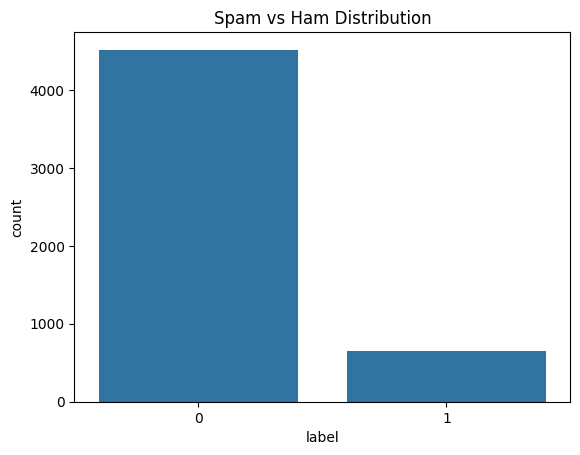

In [42]:
sns.countplot(x='label', data=df)
plt.title("Spam vs Ham Distribution")
plt.show()


# Convert text into numerical features

In [43]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(df['message'])
y = df['label']


In [46]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Train-test-split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# Train 3 Machine learning models

# Model 1--Naive Bayes

In [48]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)


# Model 2--logistic regression

In [49]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


# Model 3--support vector machine (svm)

In [50]:
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)


# Evaluate models

In [51]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


Naive Bayes Accuracy: 0.9758220502901354
Logistic Regression Accuracy: 0.9632495164410058
SVM Accuracy: 0.9825918762088974


# Report

In [52]:
print(classification_report(y_test, y_pred_svm))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.99      0.88      0.93       145

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



# Confusion Matrix

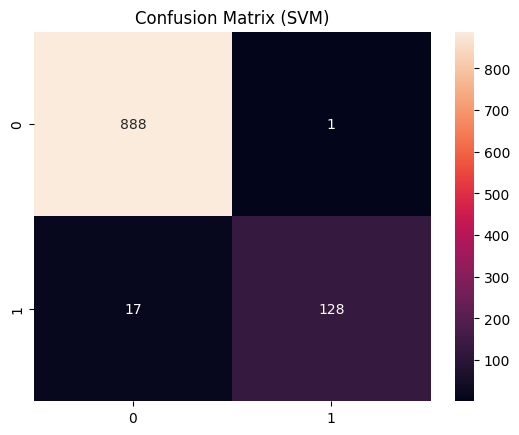

In [53]:
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d')
plt.title("Confusion Matrix (SVM)")
plt.show()


# Test With Custom Email

In [57]:
def predict_spam(text):
    text_vec = vectorizer.transform([text])
    prediction = svm.predict(text_vec)
    return "Spam" if prediction[0] == 1 else "Not Spam"

predict_spam("Congratulations! You won a free iPhone. Click here now.")


'Spam'

# `Methodology`

This project follows a structured machine learning workflow to classify emails as spam or non-spam. The methodology consists of the following steps:

## 1. Data Collection

The dataset used in this project is the Spam Email Dataset obtained from Kaggle. It contains email messages labeled as either "spam" or "ham" (not spam). The dataset includes two main attributes: the email text and its corresponding label.

## 2. Data Understanding and Exploration

The dataset was explored to understand its structure, features, and distribution of spam versus non-spam emails. Basic data inspection techniques such as checking column information, identifying missing values, and analyzing class distribution were performed.

## 3. Data Preprocessing

To prepare the data for machine learning, several preprocessing steps were applied:

Unnecessary columns were removed.

Duplicate records were eliminated.

Text labels (spam/ham) were converted into numerical form (1/0).

Email text was cleaned and transformed into numerical features using the TF-IDF (Term Frequency–Inverse Document Frequency) vectorization technique.

## 4. Data Splitting

The dataset was divided into training and testing sets using an 80/20 ratio. The training set was used to train the models, while the testing set was used to evaluate their performance on unseen data.

## 5. Model Training

Three machine learning classification algorithms were implemented:

Naive Bayes

Logistic Regression

Support Vector Machine (SVM)

Each model was trained using the training dataset.

## 6. Model Evaluation

The trained models were evaluated using performance metrics such as accuracy, precision, recall, and F1-score. A confusion matrix was also used to analyze classification performance. The results of all models were compared to identify the best-performing model.

## 7. Model Comparison and Selection

Based on evaluation results, the model with the highest accuracy and best overall performance was selected as the final model. In this project, the Support Vector Machine (SVM) achieved the best results.